In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# DataSet Information

In [3]:
df=pd.read_csv(r"C:\Users\shiva\Downloads\New folder\New folder\data.csv")

**DATA TYPES**

In [5]:
df.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateSeen        object
reviews.didPurchase     object
reviews.doRecommend     object
reviews.id             float64
reviews.numHelpful     float64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
dtype: object

In [6]:
df.describe()

reviews.id  reviews.numHelpful  reviews.rating
count  4.100000e+01        16115.000000    28332.000000
mean   1.840066e+08            0.529321        4.514048
std    2.337036e+07            9.345017        0.934957
min    1.116244e+08            0.000000        1.000000
25%    1.843344e+08            0.000000        4.000000
50%    1.885078e+08            0.000000        5.000000
75%    1.988160e+08            0.000000        5.000000
max    2.085304e+08          621.000000        5.000000

In [7]:
df.isna().count()

id                     28332
dateAdded              28332
dateUpdated            28332
name                   28332
asins                  28332
brand                  28332
categories             28332
primaryCategories      28332
imageURLs              28332
keys                   28332
manufacturer           28332
manufacturerNumber     28332
reviews.date           28332
reviews.dateSeen       28332
reviews.didPurchase    28332
reviews.doRecommend    28332
reviews.id             28332
reviews.numHelpful     28332
reviews.rating         28332
reviews.sourceURLs     28332
reviews.text           28332
reviews.title          28332
reviews.username       28332
sourceURLs             28332
dtype: int64

In [8]:
df.shape
row=df.shape[0]
cols=df.shape[1]
print('Table Dimension:',df.shape)
print('-------------')
print('Total Rows:',row)
print('-------------')
print('Total Columns:',cols)
print('-------------')
print('columns:\n',df.columns.values)

Table Dimension: (28332, 24)
-------------
Total Rows: 28332
-------------
Total Columns: 24
-------------
columns:
 ['id' 'dateAdded' 'dateUpdated' 'name' 'asins' 'brand' 'categories'
 'primaryCategories' 'imageURLs' 'keys' 'manufacturer'
 'manufacturerNumber' 'reviews.date' 'reviews.dateSeen'
 'reviews.didPurchase' 'reviews.doRecommend' 'reviews.id'
 'reviews.numHelpful' 'reviews.rating' 'reviews.sourceURLs' 'reviews.text'
 'reviews.title' 'reviews.username' 'sourceURLs']


In [7]:
print("Data Overview\n")
print(df.info())

Data Overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  

# Data Preprocessing

In [9]:
corr=df.corr()
print("Correlation Values:\n",corr)

Correlation Values:
                     reviews.id  reviews.numHelpful  reviews.rating
reviews.id            1.000000           -0.553529        0.074941
reviews.numHelpful   -0.553529            1.000000       -0.041006
reviews.rating        0.074941           -0.041006        1.000000


In [10]:
#Diffrence between actual columns and correlated columns
set1=set(df.columns)
set2=set(corr.columns)
print(set1.difference(set2))

{'keys', 'dateUpdated', 'imageURLs', 'categories', 'reviews.text', 'primaryCategories', 'manufacturer', 'reviews.username', 'reviews.doRecommend', 'dateAdded', 'reviews.didPurchase', 'name', 'asins', 'reviews.sourceURLs', 'manufacturerNumber', 'id', 'sourceURLs', 'reviews.dateSeen', 'brand', 'reviews.date', 'reviews.title'}


In [11]:
#uses the Pandas method corr() to find the feature other than rating that is most correlated with rating.
df.corr()['reviews.rating'].sort_values()

reviews.numHelpful   -0.041006
reviews.id            0.074941
reviews.rating        1.000000
Name: reviews.rating, dtype: float64

In [12]:
df['reviews.rating'].head()

0    3
1    4
2    5
3    5
4    5
Name: reviews.rating, dtype: int64

**NORMALIZATION** (Replaceing NaN value with mean value)

In [13]:
mean=df["reviews.rating"].mean()
print("\nMean of Rating Review:",mean)
df['reviews.rating'].replace(np.nan,mean,inplace=True)


Mean of Rating Review: 4.514047719892701


In [14]:
print("Total Null Values: \n")
df.isnull().sum().to_frame()

Total Null Values: 



0
id                       0
dateAdded                0
dateUpdated              0
name                     0
asins                    0
brand                    0
categories               0
primaryCategories        0
imageURLs                0
keys                     0
manufacturer             0
manufacturerNumber       0
reviews.date             0
reviews.dateSeen         0
reviews.didPurchase  28323
reviews.doRecommend  12246
reviews.id           28291
reviews.numHelpful   12217
reviews.rating           0
reviews.sourceURLs       0
reviews.text             0
reviews.title            0
reviews.username         0
sourceURLs               0

In [15]:
print('No. Of Unique Brands having Highest Rating:',df['name'][df['reviews.rating']==df['reviews.rating'].max()].nunique())
print('No. Of Unique Brands having Lowest Rating:',df['name'][df['reviews.rating']==df['reviews.rating'].min()].nunique())

No. Of Unique Brands having Highest Rating: 61
No. Of Unique Brands having Lowest Rating: 31


In [16]:
df[['name','brand']][df['reviews.text'] == df['reviews.text'].max()]

name   brand
13768  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  Amazon
26121  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...  Amazon

**ATTRIBUTES USED FOR SENTIMENT ANALYSIS**

In [17]:
data=df[['reviews.rating','reviews.text','reviews.title']]
print("Explore Filtered Data:")
data.head()

Explore Filtered Data:


reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title  
0  ... 3 of them and one of the item is bad quali...  
1  ... always the less expensive way to go for pr...  
2  ... are not Duracell but for the price i am ha...  
3  ... as well as name brand batteries at a much ...  
4  ... batteries are very long lasting the price ...

In [18]:
data.rename(columns={'reviews.rating':'reviews_rating'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [19]:
data.head()

reviews_rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title  
0  ... 3 of them and one of the item is bad quali...  
1  ... always the less expensive way to go for pr...  
2  ... are not Duracell but for the price i am ha...  
3  ... as well as name brand batteries at a much ...  
4  ... batteries are very long lasting the price ...

In [20]:
print("Explore Descriptive Statistics")
data.info()

Explore Descriptive Statistics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 3 columns):
reviews_rating    28332 non-null int64
reviews.text      28332 non-null object
reviews.title     28332 non-null object
dtypes: int64(1), object(2)
memory usage: 664.1+ KB


In [21]:
#Dimension Information
data.shape

(28332, 3)

In [22]:
#Data Statistics Description
data.describe()

reviews_rating
count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

In [23]:
data["reviews_rating"].value_counts().to_frame()

reviews_rating
5           19897
4            5648
3            1206
1             965
2             616

In [26]:
rating=data.groupby('reviews_rating',axis=0).sum()
rating

reviews.text  \
reviews_rating                                                      
1               I don't know if I would buy thus brand again s...   
2               In my opinion these did not last anywhere near...   
3               I order 3 of them and one of the item is bad q...   
4               Bulk is always the less expensive way to go fo...   
5               Well they are not Duracell but for the price i...   

                                                    reviews.title  
reviews_rating                                                     
1               ... know if I would buy thus brand again seems...  
2               ... last anywhere near as long as Duracel in t...  
3               ... 3 of them and one of the item is bad quali...  
4               ... always the less expensive way to go for pr...  
5               ... are not Duracell but for the price i am ha...

In [27]:
data.head()

reviews_rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title  
0  ... 3 of them and one of the item is bad quali...  
1  ... always the less expensive way to go for pr...  
2  ... are not Duracell but for the price i am ha...  
3  ... as well as name brand batteries at a much ...  
4  ... batteries are very long lasting the price ...

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
data.head()

reviews_rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title sentiment_label  
0  ... 3 of them and one of the item is bad quali...         Neutral  
1  ... always the less expensive way to go for pr...        Positive  
2  ... are not Duracell but for the price i am ha...        Positive  
3  ... as well as name brand batteries at a much ...        Positive  
4  ... batteries are very long lasting the price ...        Positive

In [31]:
stopset=set(stopwords.words('english'))
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [32]:
y=data['reviews_rating']

In [33]:
x=vectorizer.fit_transform(df['reviews.text'])

In [34]:
print(y.shape)
print(x.shape)

(28332,)
(28332, 10252)


# Train and Test Of the Model

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [42]:
model=SVC(gamma='scale')
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_pred=model.predict(x_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8123529411764706


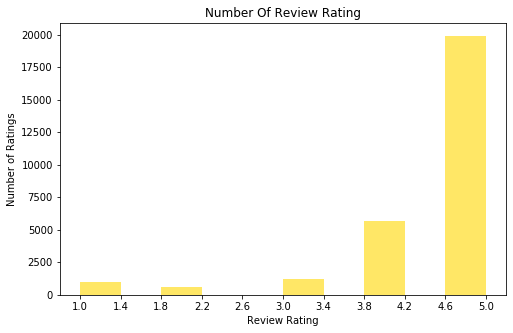

In [45]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data['reviews_rating'])

data['reviews_rating'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges,color='gold',alpha=0.6)

plt.title('Number Of Review Rating') # add a title to the histogram
plt.ylabel('Number of Ratings') # add y-label
plt.xlabel('Review Rating') # add x-label

plt.show()

In [ ]:
plt.subplots(figsize=(10,5))
data['reviews_rating'].value_counts().sort_values().plot.pie(explode=(0,0,0,0.1,0.2),shadow=True)

In [ ]:
def sentiment_labeler(score):
    if(score==5 or score==4):
        return "Positive"
    elif (score==3):
        return "Neutral"
    else:
        return "Negative"

plt.subplots(figsize=(10,5))
data["sentiment_label"]=data["reviews_rating"].apply(sentiment_labeler)
data["sentiment_label"].value_counts().sort_values().plot.pie(explode=(0.2,0.1,0.1),startangle=90)